# Lead Scoring Case study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### *Importing the data*

In [2]:
data = pd.read_csv('Leads.csv')

*Let's conduct some data analysis.*

In [3]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


- *Data is a combination of both categorical as well as numerical variables.*

In [4]:
round(100*data.isnull().sum()/data.shape[0], 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

- *There are missing values. Let's drop the columns with more than 30% of missing values.*

In [5]:
data.drop(['Tags', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
           'Asymmetrique Profile Score'], axis=1, inplace=True)

*Let's address the variables with very low percentage of missing values.*

- *`Lead Source`*
- *`TotalVisits`*
- *`Page Views Per Visit`*
- *`Last Activity`*

### *Lead Source*

In [6]:
data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
Pay per Click Ads       1
NC_EDM                  1
youtubechannel          1
welearnblog_Home        1
testone                 1
WeLearn                 1
blog                    1
Name: Lead Source, dtype: int64

- *Category `Google` is also spelled as `google`*

In [7]:
data['Lead Source'] = data['Lead Source'].str.replace('google', 'Google')

In [8]:
data['Lead Source'].mode()[0]

'Google'

In [9]:
data['Lead Source'].fillna(data['Lead Source'].mode()[0], inplace=True)

### *TotalVisits*

In [10]:
data['TotalVisits'].median()

3.0

In [11]:
data['TotalVisits'].fillna(data['TotalVisits'].median(), inplace=True)

### *Page Views Per Visit*

In [12]:
data['Page Views Per Visit'].median()

2.0

In [13]:
data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median(), inplace=True)

### *Last Activity*

In [14]:
data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [15]:
data['Last Activity'].mode()[0]

'Email Opened'

In [16]:
data['Last Activity'].fillna(data['Last Activity'].mode()[0], inplace=True)

In [17]:
round(100*data.isnull().sum()/data.shape[0], 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### *Let's address these variables now:*
- *`Country`*
- *`Specialization`*
- *`How did you hear about X Education`*
- *`What is your current occupation`*
- *`What matters most to you in choosing a course`*
- *`Lead Profile`*
- *`City`*

### *Country*

In [18]:
data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Canada                     4
Germany                    4
Sweden                     3
Netherlands                2
Uganda                     2
Philippines                2
Italy                      2
China                      2
Bangladesh                 2
Belgium                    2
Asia/Pacific Region        2
Ghana                      2
Russia                     1
Liberia                    1
Switzerland                1
Sri Lanka                  1
Tanzania                   1
Indonesia                  1
Malaysia      

- *It can be observed that the count for the category `India` is absolutely dominating.*

In [19]:
data.drop('Country', axis=1, inplace=True)

### *Specialization*

In [20]:
data['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- *Category `Select` is the mode. But this is not a useful category as it indicates the the visitor has left this item blank only and hence needs to be replaced by NaN.*

In [21]:
data['Specialization'].replace('Select', np.NaN, inplace=True)

*Let's now check the percentage of missing values in this variable.*

In [22]:
100*data['Specialization'].isnull().sum()/data.shape[0]

36.58008658008658

- *Since the missing data percentage is more than 30, let's drop this column as well.*

In [23]:
data.drop('Specialization', axis=1, inplace=True)

### *How did you hear about X Education*

In [24]:
data['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

- *Here again, category `Select` exists*

In [25]:
data['How did you hear about X Education'].replace('Select', np.NaN, inplace=True)

In [26]:
100*data['How did you hear about X Education'].isnull().sum()/data.shape[0]

78.46320346320347

In [27]:
data.drop('How did you hear about X Education', axis=1, inplace=True)

### *What is your current occupation*

In [28]:
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
data.drop('What is your current occupation', axis=1, inplace=True)

### *What matters most to you in choosing a course*

In [30]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- *Here again, we can witness that one category is absolutely dominant.*

In [31]:
data.drop('What matters most to you in choosing a course', axis=1, inplace=True)

### *Lead Profile*

In [32]:
data['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [33]:
data['Lead Profile'].replace('Select', np.NaN, inplace=True)

In [34]:
100*data['Lead Profile'].isnull().sum()/data.shape[0]

74.18831168831169

In [35]:
data.drop('Lead Profile', axis=1, inplace=True)

### *City*

In [36]:
data['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

- *Here, Let's replace the category `Select` with `Other Cities`*

In [37]:
data['City'] = data['City'].replace('Select', 'Other Cities')

In [38]:
data['City'].value_counts()

Mumbai                         3222
Other Cities                   2935
Thane & Outskirts               752
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [39]:
data['City'].fillna(data['City'].mode()[0], inplace=True)

In [40]:
data.shape

(9240, 25)

In [41]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,No,No,No,No,Other Cities,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,No,No,No,No,Other Cities,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


### *Let's now use some visualizations in order to gather some insights.*

- ##### *Categorical Columns*

In [42]:
data.select_dtypes(include='object').columns[:]

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

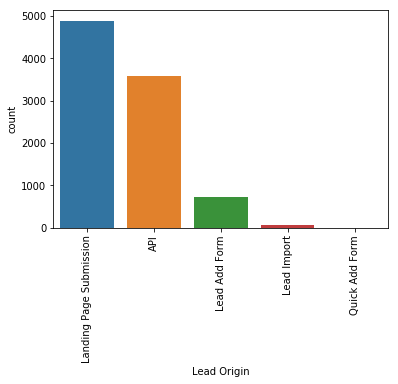

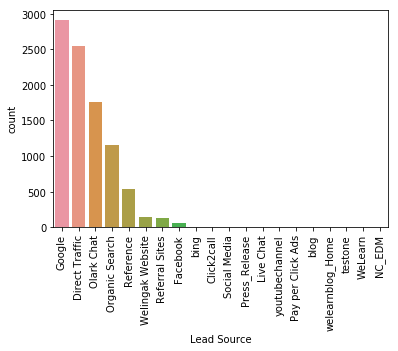

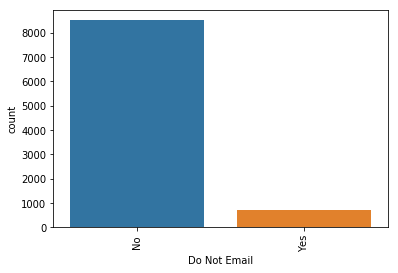

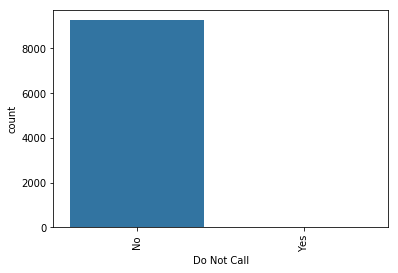

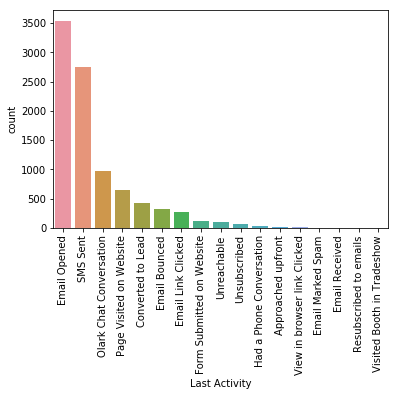

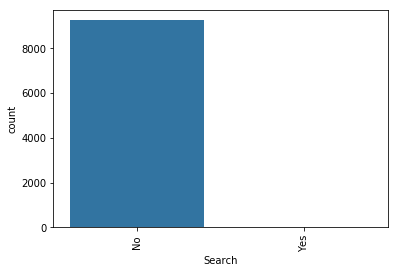

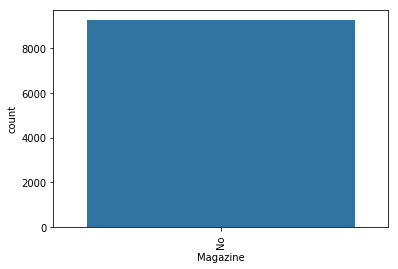

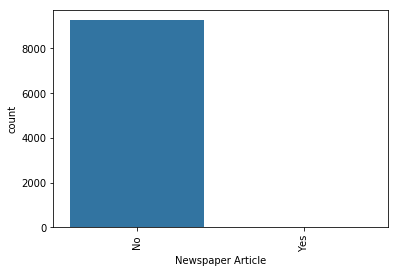

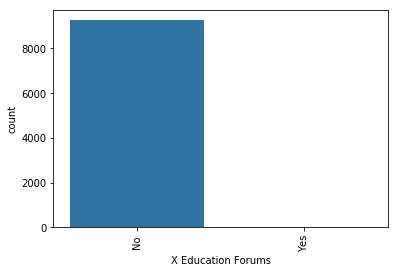

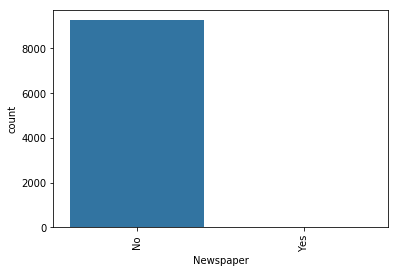

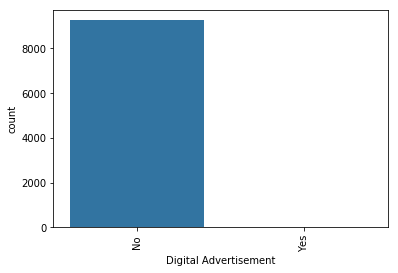

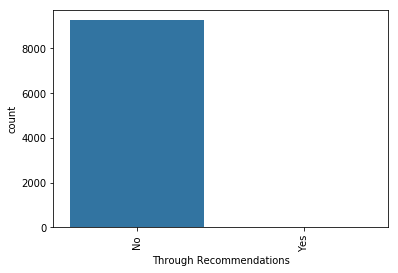

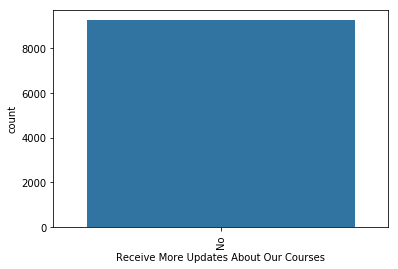

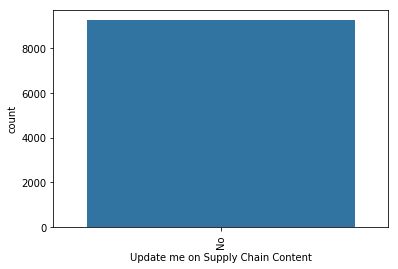

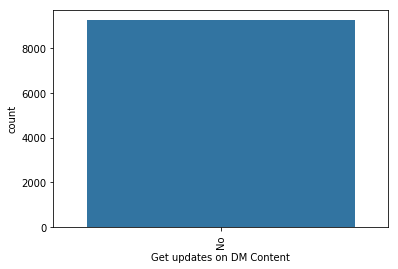

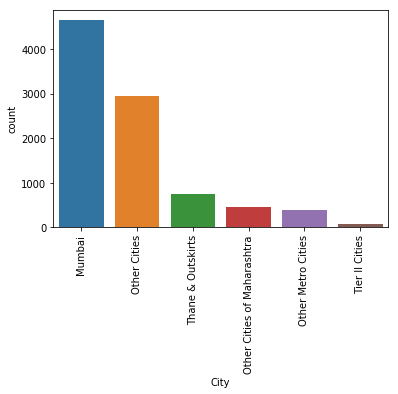

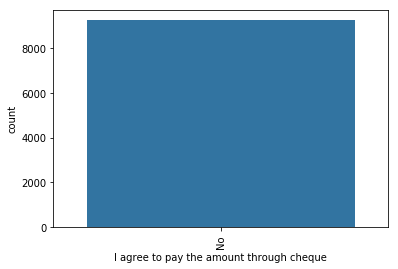

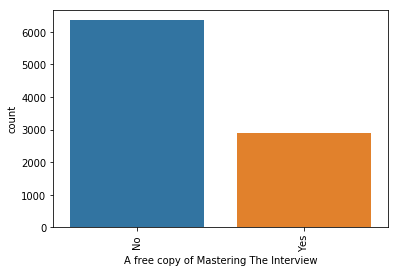

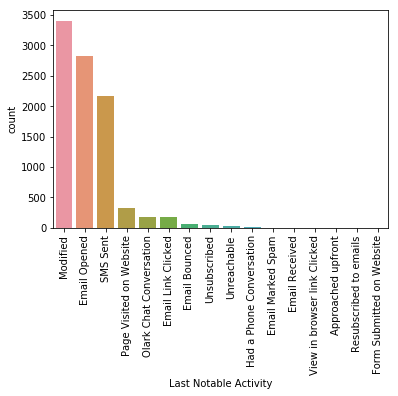

In [43]:
for i in data.select_dtypes(include='object').columns[1:]:
    sns.countplot(data[i], order=data[i].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

## *Some Observations*
- *`Do Not Call`, `Search`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations` has the category `No` in a very dominant manner.*
- *`Magazine`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque` have only a single category.*
- *`Last Activity` and `Last Notable Activity` seem to be similar. Let's drop `Last Activity`.*

*Let's drop the extremely skewed categorical columns*

In [44]:
data.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
           'Through Recommendations'], axis=1, inplace=True)

*Let's drop the single category column*

In [45]:
data.drop(['Magazine','Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
           'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1, inplace=True)

In [46]:
data.drop('Last Activity', axis=1, inplace=True)

### *Let's now visualize the numerical columns*

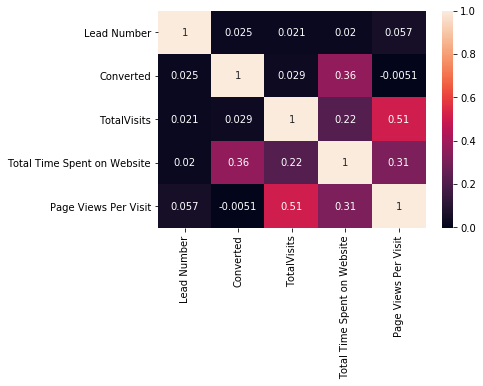

In [47]:
sns.heatmap(data.select_dtypes(exclude='object').corr(), annot=True)
plt.show()

In [48]:
data.select_dtypes(exclude='object').columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

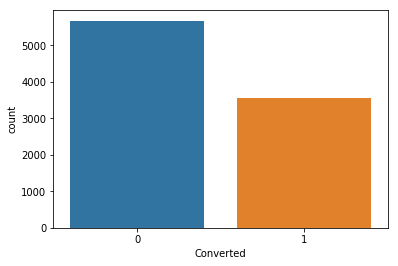

In [49]:
sns.countplot(data['Converted'])
plt.show()

- *Category 0 is more than Category 1. But the imbalnce is not very high.*

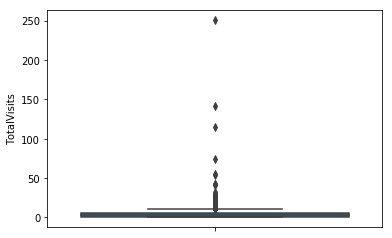

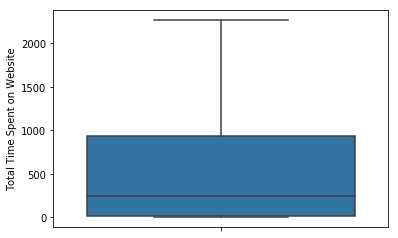

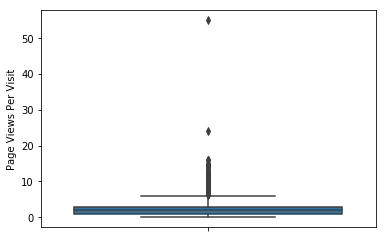

In [50]:
for i in ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']:
    sns.boxplot(y = data[i])
    plt.show()

- *Many number of outliers in case of `TotalVisits` and `Page View Per Visit`*

In [51]:
data['TotalVisits'].describe(percentiles=[0.0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.96,0.97,0.98,0.99,1])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
0%          0.000000
1%          0.000000
5%          0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
96%        10.000000
97%        11.000000
98%        13.000000
99%        17.000000
100%      251.000000
max       251.000000
Name: TotalVisits, dtype: float64

- *Gradual increase specifically upto 98th Percentile. After that, the increase is steep especially after 99th Percentile. Let's cap the values using 98th percentile*

In [52]:
data['TotalVisits'] = data['TotalVisits'].apply(lambda x : 13 if x>13 else x)

In [53]:
data['Page Views Per Visit'].describe(percentiles=[0.0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.96,0.97,0.98,0.99,1])

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
0%          0.000000
1%          0.000000
5%          0.000000
10%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
96%         6.000000
97%         7.000000
98%         8.000000
99%         9.000000
100%       55.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [54]:
data['Page Views Per Visit'] = data['Page Views Per Visit'].apply(lambda x : 9 if x>9 else x)

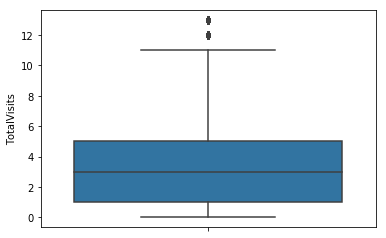

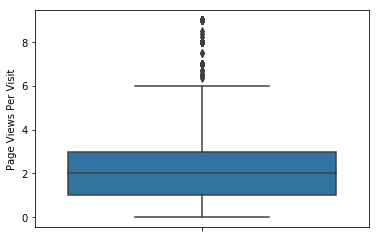

In [55]:
for i in ['TotalVisits', 'Page Views Per Visit']:
    sns.boxplot(y = data[i])
    plt.show()

- *Still some outliers present but issue resolved to a large extent.*

In [56]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Other Cities,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Other Cities,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Mumbai,No,Modified


*Let's now convert the categories into numbers*

In [57]:
data.select_dtypes(include='object').nunique()==2

Prospect ID                               False
Lead Origin                               False
Lead Source                               False
Do Not Email                               True
City                                      False
A free copy of Mastering The Interview     True
Last Notable Activity                     False
dtype: bool

In [58]:
for i in ['Do Not Email', 'A free copy of Mastering The Interview']:
    data[i] = data[i].apply(lambda x : 1 if x == 'Yes' else 0)

*Let's now address the other categorical variables.*

In [59]:
data.select_dtypes(include='object').columns[:]

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'City',
       'Last Notable Activity'],
      dtype='object')

In [60]:
dummy_lead_origin = pd.get_dummies(data['Lead Origin'], drop_first=True)
data = pd.concat([dummy_lead_origin, data], axis=1)
data.drop('Lead Origin', axis=1, inplace=True)

In [61]:
dummy_lead_source = pd.get_dummies(data['Lead Source'], drop_first=True)
data = pd.concat([dummy_lead_source, data], axis=1)
data.drop('Lead Source', axis=1, inplace=True)

In [62]:
dummy_city = pd.get_dummies(data['City'])
dummy_city.head()

,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


*Let's drop `Thane & Outskirts`*

In [63]:
dummy_city.drop('Thane & Outskirts', axis=1, inplace=True)
data = pd.concat([dummy_city, data], axis=1)
data.drop('City', axis=1, inplace=True)

In [64]:
dummy_last_notable_activity = pd.get_dummies(data['Last Notable Activity'], drop_first=True)
data = pd.concat([dummy_last_notable_activity, data], axis=1)
data.drop('Last Notable Activity', axis=1, inplace=True)

In [65]:
data.head(3)

,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Tier II Cities,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,testone,welearnblog_Home,youtubechannel,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1


- *There are numerical variables on different scale. Let's address them by Normalizing them.*

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [67]:
cols_to_scale = ['Lead Number', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
cols_to_scale

['Lead Number',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

*Let's now split the data into train and test sets.*

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
df_train, df_test = train_test_split(data, train_size=0.8, random_state=100)

In [70]:
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

In [71]:
df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])

In [72]:
df_train.head()

,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Tier II Cities,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,testone,welearnblog_Home,youtubechannel,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
7263,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1f2af90a-a1b4-42c2-9a4e-462f0c886d93,0.175718,0,1,0.000000,0.000000,0.000000,0
6468,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1c198af1-9fc1-4d9a-819b-7a79d606279e,0.255800,0,0,0.153846,0.060739,0.222222,1
7833,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18c7500e-7864-488f-838d-d6a624cddb1f,0.125499,0,1,0.153846,0.034771,0.222222,1
4461,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6e08a1d7-b3e8-40a8-948f-09c85257c62b,0.459472,0,0,0.307692,0.694982,0.444444,0
8453,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2499ad4b-a9c6-4f68-b6f6-5705f649fe7e,0.071770,0,0,0.000000,0.000000,0.000000,0


### *Let's now start the Model Building Process*

In [73]:
X_train = df_train.drop(['Converted', 'Prospect ID'], axis=1)
y_train = df_train['Converted']

In [74]:
X_train.shape

(7392, 49)

*As number of variables is on the higher side, therefore it is more convenient to use `RFE`.*

In [75]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 25)      ## Top 25 variables
rfe = rfe.fit(X_train, y_train)

In [76]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Email Bounced', True, 1),
 ('Email Link Clicked', True, 1),
 ('Email Marked Spam', False, 7),
 ('Email Opened', True, 1),
 ('Email Received', True, 1),
 ('Form Submitted on Website', False, 11),
 ('Had a Phone Conversation', True, 1),
 ('Modified', True, 1),
 ('Olark Chat Conversation', True, 1),
 ('Page Visited on Website', True, 1),
 ('Resubscribed to emails', True, 1),
 ('SMS Sent', True, 1),
 ('Unreachable', True, 1),
 ('Unsubscribed', True, 1),
 ('View in browser link Clicked', False, 25),
 ('Mumbai', True, 1),
 ('Other Cities', False, 21),
 ('Other Cities of Maharashtra', False, 18),
 ('Other Metro Cities', False, 22),
 ('Tier II Cities', False, 9),
 ('Direct Traffic', True, 1),
 ('Facebook', False, 14),
 ('Google', False, 3),
 ('Live Chat', False, 19),
 ('NC_EDM', False, 4),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 2),
 ('Pay per Click Ads', False, 10),
 ('Press_Release', False, 13),
 ('Reference', True, 1),
 ('Referral Sites', True, 1),
 ('Social Media', False, 5

In [77]:
rfe_cols = X_train.columns[rfe.support_]
rfe_cols = list(rfe_cols)
rfe_cols

['Email Bounced',
 'Email Link Clicked',
 'Email Opened',
 'Email Received',
 'Had a Phone Conversation',
 'Modified',
 'Olark Chat Conversation',
 'Page Visited on Website',
 'Resubscribed to emails',
 'SMS Sent',
 'Unreachable',
 'Unsubscribed',
 'Mumbai',
 'Direct Traffic',
 'Olark Chat',
 'Reference',
 'Referral Sites',
 'Welingak Website',
 'blog',
 'Lead Add Form',
 'Lead Number',
 'Do Not Email',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

*Let's use these columns for our predictions*

In [78]:
X_train = X_train[rfe_cols]

In [79]:
import statsmodels.api as sm

In [80]:
X_train_sm = sm.add_constant(X_train)
model_1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7366
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3239.9
Date:                Sat, 29 Feb 2020   Deviance:                       6479.7
Time:                        13:49:14   Pearson chi2:                 7.58e+03
No. Iterations:                    20   Covariance Type:             nonrobust
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.2512      1.412     -0.886      0.376      -4.019       1.516
E

*Dropping `Email Received`*

In [81]:
X_train.drop('Email Received', axis=1, inplace=True)

In [82]:
X_train_sm = sm.add_constant(X_train)
model_2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7366
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3239.9
Date:                Sat, 29 Feb 2020   Deviance:                       6479.7
Time:                        13:49:14   Pearson chi2:                 7.58e+03
No. Iterations:                    20   Covariance Type:             nonrobust
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.2512      1.412     -0.886      0.376      -4.019       1.516
E

*Dropping `Resubscribed to emails`*

In [83]:
X_train.drop('Resubscribed to emails', axis=1, inplace=True)

In [84]:
X_train_sm = sm.add_constant(X_train)
model_3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7368
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3240.7
Date:                Sat, 29 Feb 2020   Deviance:                       6481.5
Time:                        13:49:14   Pearson chi2:                 7.58e+03
No. Iterations:                    19   Covariance Type:             nonrobust
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.1155      1.183     -0.098      0.922      -2.434       2.203
E

*Dropping `blog`*

In [85]:
X_train.drop('blog', axis=1, inplace=True)

In [86]:
X_train_sm = sm.add_constant(X_train)
model_4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7369
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3241.2
Date:                Sat, 29 Feb 2020   Deviance:                       6482.3
Time:                        13:49:14   Pearson chi2:                 7.58e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.1148      1.183     -0.097      0.923      -2.433       2.204
E

*Dropping `Unreachable`*

In [87]:
X_train.drop('Unreachable', axis=1, inplace=True)

In [88]:
X_train_sm = sm.add_constant(X_train)
model_5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7370
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3241.3
Date:                Sat, 29 Feb 2020   Deviance:                       6482.5
Time:                        13:49:15   Pearson chi2:                 7.58e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.5821      0.451     -1.290      0.197      -1.467       0.303
E

*Dropping `SMS Sent`*

In [89]:
X_train.drop('SMS Sent', axis=1, inplace=True)

In [90]:
X_train_sm = sm.add_constant(X_train)
model_6 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model_6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7371
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3241.3
Date:                Sat, 29 Feb 2020   Deviance:                       6482.6
Time:                        13:49:15   Pearson chi2:                 7.58e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.6795      0.120     -5.677      0.000      -0.914      -0.445
E

*Dropping `Unsubscribed`*

In [91]:
X_train.drop('Unsubscribed', axis=1, inplace=True)

In [92]:
X_train_sm = sm.add_constant(X_train)
model_7 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model_7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7372
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3241.9
Date:                Sat, 29 Feb 2020   Deviance:                       6483.7
Time:                        13:49:15   Pearson chi2:                 7.59e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.6837      0.120     -5.715      0.000      -0.918      -0.449
E

*Dropping `Had a Phone Conversation`*

In [93]:
X_train.drop('Had a Phone Conversation', axis=1, inplace=True)

In [94]:
X_train_sm = sm.add_constant(X_train)
model_8 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model_8.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7373
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3243.6
Date:                Sat, 29 Feb 2020   Deviance:                       6487.1
Time:                        13:49:15   Pearson chi2:                 7.60e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.6735      0.119     -5.639      0.000      -0.908      -0.439
E

*Let's also check the VIF values*

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
12,Lead Add Form,16.03
9,Reference,12.99
17,Page Views Per Visit,5.73
15,TotalVisits,5.34
11,Welingak Website,3.90
13,Lead Number,3.39
3,Modified,2.31
2,Email Opened,2.08
6,Mumbai,2.01
16,Total Time Spent on Website,2.01


*Dropping `Lead Add Form`*

In [96]:
X_train.drop('Lead Add Form', axis=1, inplace=True)

In [97]:
X_train_sm = sm.add_constant(X_train)
model_9 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model_9.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7374
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3271.6
Date:                Sat, 29 Feb 2020   Deviance:                       6543.2
Time:                        13:49:16   Pearson chi2:                 7.59e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.5094      0.116     -4.373      0.000      -0.738      -0.281
E

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
16,Page Views Per Visit,5.73
14,TotalVisits,5.34
12,Lead Number,3.37
3,Modified,2.31
2,Email Opened,2.08
15,Total Time Spent on Website,2.01
6,Mumbai,2.01
8,Olark Chat,1.63
7,Direct Traffic,1.48
5,Page Visited on Website,1.25


*Dropping `Page Views Per Visit`*

In [99]:
X_train.drop('Page Views Per Visit', axis=1, inplace=True)

In [100]:
X_train_sm = sm.add_constant(X_train)
model_10 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()
print(model_10.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7375
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3288.7
Date:                Sat, 29 Feb 2020   Deviance:                       6577.4
Time:                        13:49:16   Pearson chi2:                 7.58e+03
No. Iterations:                     7   Covariance Type:             nonrobust
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.7547      0.108     -6.956      0.000      -0.967      -0.542
E

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
12,Lead Number,3.25
14,TotalVisits,2.80
3,Modified,2.29
2,Email Opened,2.07
6,Mumbai,1.99
15,Total Time Spent on Website,1.97
8,Olark Chat,1.58
7,Direct Traffic,1.48
13,Do Not Email,1.22
5,Page Visited on Website,1.21


*Both the `p-values` and the `VIF` are within permissible limits.*

In [102]:
y_train_pred = pd.DataFrame(df_train['Prospect ID'])
y_train_pred['Converted'] = df_train['Converted']
y_train_pred['Probability'] = model_10.predict(X_train_sm)

In [103]:
y_train_pred.head()

,Prospect ID,Converted,Probability
7263,1f2af90a-a1b4-42c2-9a4e-462f0c886d93,1,0.142255
6468,1c198af1-9fc1-4d9a-819b-7a79d606279e,0,0.299607
7833,18c7500e-7864-488f-838d-d6a624cddb1f,1,0.340783
4461,6e08a1d7-b3e8-40a8-948f-09c85257c62b,0,0.925055
8453,2499ad4b-a9c6-4f68-b6f6-5705f649fe7e,0,0.134879


*Let's now use different cut offs to make the predictions*

In [104]:
num = [i/10 for i in range(10)]
for i in num:
    y_train_pred[i] = y_train_pred['Probability'].apply(lambda x : 1 if x>i else 0)

In [105]:
y_train_pred.head()

,Prospect ID,Converted,Probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7263,1f2af90a-a1b4-42c2-9a4e-462f0c886d93,1,0.142255,1,1,0,0,0,0,0,0,0,0
6468,1c198af1-9fc1-4d9a-819b-7a79d606279e,0,0.299607,1,1,1,0,0,0,0,0,0,0
7833,18c7500e-7864-488f-838d-d6a624cddb1f,1,0.340783,1,1,1,1,0,0,0,0,0,0
4461,6e08a1d7-b3e8-40a8-948f-09c85257c62b,0,0.925055,1,1,1,1,1,1,1,1,1,1
8453,2499ad4b-a9c6-4f68-b6f6-5705f649fe7e,0,0.134879,1,1,0,0,0,0,0,0,0,0


In [106]:
from sklearn.metrics import confusion_matrix
diff_cutoffs = pd.DataFrame(columns = ['Cut off', 'Accuracy', 'Sensitivity', 'Specificity'])
for i in num:
    cm = confusion_matrix(y_train_pred['Converted'], y_train_pred[i])
    total = sum(sum(cm))
    acc = (cm[0,0]+cm[1,1])/(total)
    sensi = cm[1,1]/(cm[1,1]+cm[1,0])
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    diff_cutoffs.loc[i] = [i, acc, sensi, speci]

In [107]:
diff_cutoffs.reset_index(drop=True, inplace=True)

In [108]:
diff_cutoffs

,Cut off,Accuracy,Sensitivity,Specificity
0,0.0,0.382711,1.000000,0.000000
1,0.1,0.530438,0.967833,0.259259
2,0.2,0.738095,0.902439,0.636204
3,0.3,0.794643,0.831743,0.771641
4,0.4,0.800460,0.761046,0.824896
5,0.5,0.796537,0.670201,0.874863
6,0.6,0.785038,0.573701,0.916064
7,0.7,0.761634,0.465889,0.944992
8,0.8,0.736878,0.365147,0.967346
9,0.9,0.692505,0.214917,0.988604


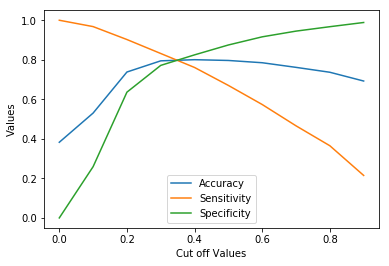

In [109]:
diff_cutoffs.plot.line(x='Cut off', y=['Accuracy', 'Sensitivity', 'Specificity'])
plt.xlabel('Cut off Values')
plt.ylabel('Values')
plt.show()

*Let's select the cut off = 0.3*

In [110]:
y_train_pred[['Prospect ID', 'Converted', 'Probability', 0.3]].head()

,Prospect ID,Converted,Probability,0.3
7263,1f2af90a-a1b4-42c2-9a4e-462f0c886d93,1,0.142255,0
6468,1c198af1-9fc1-4d9a-819b-7a79d606279e,0,0.299607,0
7833,18c7500e-7864-488f-838d-d6a624cddb1f,1,0.340783,1
4461,6e08a1d7-b3e8-40a8-948f-09c85257c62b,0,0.925055,1
8453,2499ad4b-a9c6-4f68-b6f6-5705f649fe7e,0,0.134879,0


*Let's now make use of the ROC Curve*

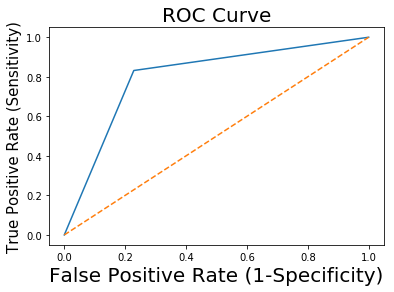

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score
false_pr, true_pr, thresh = roc_curve(y_train, y_train_pred[0.3])

plt.plot(false_pr, true_pr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate (1-Specificity)', fontsize=20)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=15)
plt.title('ROC Curve', fontsize=20)
plt.show()

*Let's now also make the predictions on test data*

In [112]:
X_test = df_test[X_train.columns]
y_test = df_test['Converted']

In [113]:
X_test_sm = sm.add_constant(X_test)

In [114]:
y_test_pred = pd.DataFrame(df_test['Prospect ID'])
y_test_pred['Converted'] = df_test['Converted']
y_test_pred['Probability'] = model_10.predict(X_test_sm)

In [115]:
y_test_pred['Predicted'] = y_test_pred['Probability'].apply(lambda x : 1 if x>0.3 else 0)

In [116]:
y_test_pred.head()

,Prospect ID,Converted,Probability,Predicted
4269,dd53b3eb-ae22-474c-b872-48b05bbe180b,1,0.794567,1
2376,7a960b03-466c-4e36-bf12-b755fc77a0b1,1,0.978153,1
7766,2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,1,0.425931,1
9199,6eb89ae5-d1e0-4c19-8661-8f9545e0e408,0,0.130275,0
4359,f7ed6c72-7d36-413c-b2e0-414213c4ceef,1,0.900319,1


In [117]:
confusion_matrix(y_test_pred['Converted'], y_test_pred['Predicted'])

array([[850, 266],
       [123, 609]], dtype=int64)

In [118]:
#Accuracy
(850+609)/(850+609+266+123)

0.7895021645021645

In [119]:
#Sensitivity
609/(609+123)

0.8319672131147541

In [120]:
#Specificity
850/(850+266)

0.7616487455197133

*Therefore, good values of `Accuracy` and `Specificity` are obtained and especially `Sensitivity` which is also in line with the problem statement*

In [121]:
y_test_pred.head()

,Prospect ID,Converted,Probability,Predicted
4269,dd53b3eb-ae22-474c-b872-48b05bbe180b,1,0.794567,1
2376,7a960b03-466c-4e36-bf12-b755fc77a0b1,1,0.978153,1
7766,2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,1,0.425931,1
9199,6eb89ae5-d1e0-4c19-8661-8f9545e0e408,0,0.130275,0
4359,f7ed6c72-7d36-413c-b2e0-414213c4ceef,1,0.900319,1


### *Let's now obtain the Probabilities for the entire data set for determining the Lead Scores.*

In [122]:
y_train_pred_final = y_train_pred[['Prospect ID', 'Converted', 'Probability', 0.3]]

In [123]:
y_train_pred_final.columns = ['Prospect ID', 'Converted', 'Probability', 'Predicted']

In [124]:
lead_scores = pd.concat([y_train_pred_final, y_test_pred])

In [125]:
lead_scores.head()

,Prospect ID,Converted,Probability,Predicted
7263,1f2af90a-a1b4-42c2-9a4e-462f0c886d93,1,0.142255,0
6468,1c198af1-9fc1-4d9a-819b-7a79d606279e,0,0.299607,0
7833,18c7500e-7864-488f-838d-d6a624cddb1f,1,0.340783,1
4461,6e08a1d7-b3e8-40a8-948f-09c85257c62b,0,0.925055,1
8453,2499ad4b-a9c6-4f68-b6f6-5705f649fe7e,0,0.134879,0


In [126]:
lead_scores['Lead Score'] = round(100*lead_scores['Probability'], 2)

In [127]:
lead_scores.head()

,Prospect ID,Converted,Probability,Predicted,Lead Score
7263,1f2af90a-a1b4-42c2-9a4e-462f0c886d93,1,0.142255,0,14.23
6468,1c198af1-9fc1-4d9a-819b-7a79d606279e,0,0.299607,0,29.96
7833,18c7500e-7864-488f-838d-d6a624cddb1f,1,0.340783,1,34.08
4461,6e08a1d7-b3e8-40a8-948f-09c85257c62b,0,0.925055,1,92.51
8453,2499ad4b-a9c6-4f68-b6f6-5705f649fe7e,0,0.134879,0,13.49


*Let's now consider the Hot Leads as having lead scores more than or equal to 80.*

In [128]:
potential_hot_leads = lead_scores[lead_scores['Lead Score']>=80]

In [129]:
potential_hot_leads = potential_hot_leads.sort_values(by='Lead Score', ascending=False)
potential_hot_leads

,Prospect ID,Converted,Probability,Predicted,Lead Score
7219,ed62264f-7666-4bf9-9cb6-5b9a825f1e67,1,0.999402,1,99.94
2011,d41b76fd-e215-463c-a9be-6dcfc2440e90,1,0.998486,1,99.85
2594,597169d6-a4bb-4efb-807b-17b0fd928492,1,0.998145,1,99.81
6243,d34b684a-7d92-4f13-abfb-8a507ce0351c,1,0.997573,1,99.76
6620,588ddab6-30c5-4153-a3de-28539113bb5d,1,0.997574,1,99.76
994,1627d1fe-f39b-4a29-ba9e-ab40ab643d05,1,0.997226,1,99.72
2158,90866f3e-deb3-46d3-9c98-188d4f1ffdeb,1,0.997135,1,99.71
949,963516d0-1d43-4952-82a5-67de560c4ef0,1,0.997093,1,99.71
818,4cb2a48d-e9d2-4845-acb1-baaad08c8c07,1,0.997130,1,99.71
739,2ccb407a-1cf0-4231-b15a-7ac8a6ad7f05,1,0.996892,1,99.69


- #### *These are the potential Hot leads.*